学习朴素贝叶斯算法。

# classif.naive_bayes

In [2]:
library(tidyverse)
library(mlr3verse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3



In [ ]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_nb <- as_learner(
  ppl("robustify") %>>%
    lrn("classif.naive_bayes", id = "nb")
)
lrn_nb$id <- "nb_robust"

# 训练
lrn_nb$train(tsk_german)

# 预测
pred_nb <- lrn_nb$predict(tsk_german)

# 评估
pred_nb$score(msr("classif.acc"))

# classif.acc: 0.728

classif.acc 
      0.728

In [ ]:
lrn_nb$pipeops$nb$param_set

# <ParamSet(3)>
#           id    class lower upper nlevels default  value
#       <char>   <char> <num> <num>   <num>  <list> <list>
# 1:       eps ParamDbl  -Inf   Inf     Inf       0 [NULL]
# 2:   laplace ParamDbl     0   Inf     Inf       0 [NULL]
# 3: threshold ParamDbl  -Inf   Inf     Inf   0.001 [NULL]

<ParamSet(3)>
          id    class lower upper nlevels default  value
      <char>   <char> <num> <num>   <num>  <list> <list>
1:       eps ParamDbl  -Inf   Inf     Inf       0 [NULL]
2:   laplace ParamDbl     0   Inf     Inf       0 [NULL]
3: threshold ParamDbl  -Inf   Inf     Inf   0.001 [NULL]

In [11]:
lrn_nb$model$nb

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


$model

Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = x, y = y)

A-priori probabilities:
y
good  bad 
 0.7  0.3 

Conditional probabilities:
      age
y          [,1]     [,2]
  good 36.22429 11.38114
  bad  33.96333 11.22238

      amount
y          [,1]     [,2]
  good 2985.457 2401.472
  bad  3938.127 3535.819

      duration
y          [,1]     [,2]
  good 19.20714 11.07956
  bad  24.86000 13.28264

      credit_history.delay.in.paying.off.in.the.past
y            [,1]      [,2]
  good 0.02142857 0.1449117
  bad  0.08333333 0.2768472

      credit_history.critical.account.other.credits.elsewhere
y            [,1]      [,2]
  good 0.03000000 0.1707092
  bad  0.09333333 0.2913850

      credit_history.no.credits.taken.all.credits.paid.back.duly
y           [,1]      [,2]
  good 0.5157143 0.5001103
  bad  0.5633333 0.4968014

      credit_history.existing.credits.paid.back.duly.till.now
y            [,1]      [,2]
  good 0.08571429 0.2801419
  bad  0.093

In [14]:
lrn_test <- lrn("classif.naive_bayes")
lrn_test

<LearnerClassifNaiveBayes:classif.naive_bayes>: Naive Bayes
* Model: -
* Parameters: list()
* Packages: mlr3, mlr3learners, e1071
* Predict Types:  [response], prob
* Feature Types: logical, integer, numeric, factor
* Properties: multiclass, twoclass

In [16]:
lrn_test <- lrn("classif.naive_bayes_multinomial")
lrn_test

<LearnerClassifNaiveBayesMultinomial:classif.naive_bayes_multinomial>: Multinomial Naive Bayes
* Model: -
* Parameters: list()
* Packages: mlr3, RWeka
* Predict Types:  [response], prob
* Feature Types: integer, numeric
* Properties: multiclass, twoclass

In [ ]:
# 定义任务
tsk_iris <- tsk("iris")

# 定义学习器
lrn_nb <- lrn("classif.naive_bayes")

# 重抽样
rr_nb <- resample(
  task = tsk_iris,
  learner = lrn_nb,
  resampling = rsmp("cv", folds = 5)
)

rr_nb$aggregate(msr("classif.acc"))

# classif.acc: 0.96

INFO  [17:27:10.407] [mlr3] Applying learner 'classif.naive_bayes' on task 'iris' (iter 1/5)
INFO  [17:27:10.417] [mlr3] Applying learner 'classif.naive_bayes' on task 'iris' (iter 2/5)
INFO  [17:27:10.427] [mlr3] Applying learner 'classif.naive_bayes' on task 'iris' (iter 3/5)
INFO  [17:27:10.436] [mlr3] Applying learner 'classif.naive_bayes' on task 'iris' (iter 4/5)
INFO  [17:27:10.443] [mlr3] Applying learner 'classif.naive_bayes' on task 'iris' (iter 5/5)


classif.acc 
       0.96

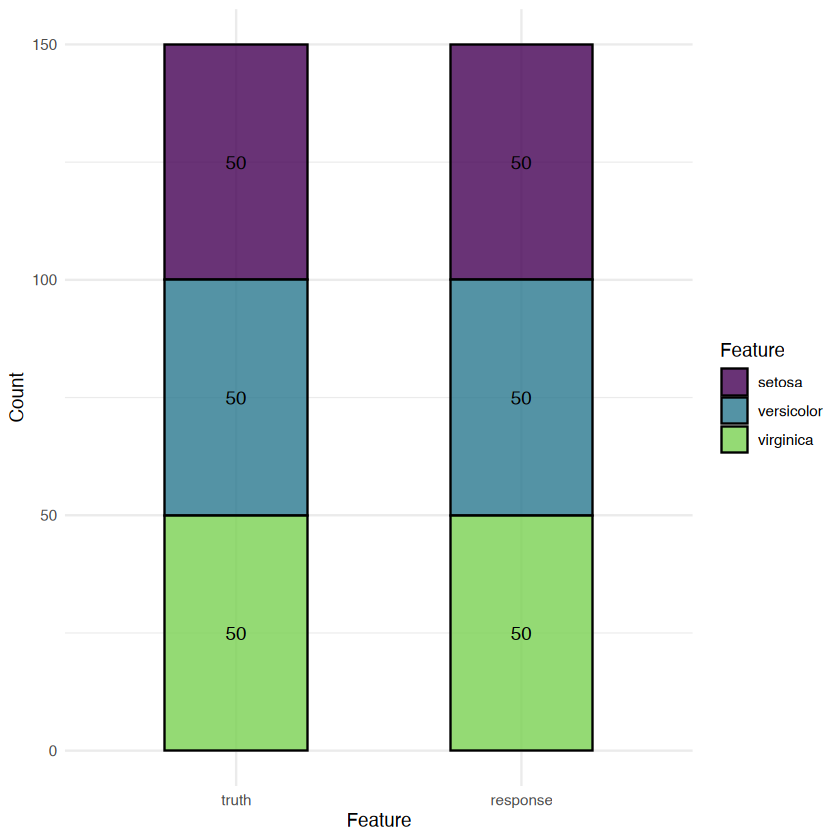

In [ ]:
# 训练
lrn_nb$train(tsk_iris)

# 预测
pred_nb <- lrn_nb$predict(tsk_iris)

# 绘图
autoplot(pred_nb, type = "stacked")

# classif.naive_bayes_multinomial

In [ ]:
# 定义任务
tsk_iris <- tsk("iris")

# 定义学习器
lrn_nbm <- lrn("classif.naive_bayes_multinomial")

# 训练
lrn_nbm$train(tsk_iris)

# 预测
pred_nbm <- lrn_nbm$predict(tsk_iris)

# 得分
pred_nbm$score(msr("classif.acc"))

# classif.acc: 0.953333333333333

classif.acc 
  0.9533333

In [ ]:
lrn_nbm$param_set

# <ParamSet(7)>
#                           id    class lower upper nlevels        default  value
#                       <char>   <char> <num> <num>   <num>         <list> <list>
# 1:                    subset ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
# 2:                 na.action ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
# 3:         output_debug_info ParamLgl    NA    NA       2          FALSE [NULL]
# 4: do_not_check_capabilities ParamLgl    NA    NA       2          FALSE [NULL]
# 5:        num_decimal_places ParamInt     1   Inf     Inf              2 [NULL]
# 6:                batch_size ParamInt     1   Inf     Inf            100 [NULL]
# 7:                   options ParamUty    NA    NA     Inf         [NULL] [NULL]

<ParamSet(7)>
                          id    class lower upper nlevels        default  value
                      <char>   <char> <num> <num>   <num>         <list> <list>
1:                    subset ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
2:                 na.action ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
3:         output_debug_info ParamLgl    NA    NA       2          FALSE [NULL]
4: do_not_check_capabilities ParamLgl    NA    NA       2          FALSE [NULL]
5:        num_decimal_places ParamInt     1   Inf     Inf              2 [NULL]
6:                batch_size ParamInt     1   Inf     Inf            100 [NULL]
7:                   options ParamUty    NA    NA     Inf         [NULL] [NULL]

# classif.naive_bayes_weka

In [ ]:
# 定义任务
tsk_iris <- tsk("iris")

# 定义学习器
lrn_nbw <- lrn("classif.naive_bayes_weka")

# 训练
lrn_nbw$train(tsk_iris)

# 预测
pred_nbw <- lrn_nbw$predict(tsk_iris)

# 得分
pred_nbw$score(msr("classif.acc"))

# classif.acc: 0.96

classif.acc 
       0.96

In [ ]:
lrn_nbw$param_set %>%
  as.data.table() %>%
  select(1:6) %>%
  print()

# id    class lower upper      levels nlevels
#                        <char>   <char> <num> <num>      <list>   <num>
#  1:                    subset ParamUty    NA    NA      [NULL]     Inf
#  2:                 na.action ParamUty    NA    NA      [NULL]     Inf
#  3:                         K ParamLgl    NA    NA  TRUE,FALSE       2
#  4:                         D ParamLgl    NA    NA  TRUE,FALSE       2
#  5:                         O ParamLgl    NA    NA  TRUE,FALSE       2
#  6:         output_debug_info ParamLgl    NA    NA  TRUE,FALSE       2
#  7: do_not_check_capabilities ParamLgl    NA    NA  TRUE,FALSE       2
#  8:        num_decimal_places ParamInt     1   Inf      [NULL]     Inf
#  9:                batch_size ParamInt     1   Inf      [NULL]     Inf
# 10:                   options ParamUty    NA    NA      [NULL]     Inf

                           id    class lower upper      levels nlevels
                       <char>   <char> <num> <num>      <list>   <num>
 1:                    subset ParamUty    NA    NA      [NULL]     Inf
 2:                 na.action ParamUty    NA    NA      [NULL]     Inf
 3:                         K ParamLgl    NA    NA  TRUE,FALSE       2
 4:                         D ParamLgl    NA    NA  TRUE,FALSE       2
 5:                         O ParamLgl    NA    NA  TRUE,FALSE       2
 6:         output_debug_info ParamLgl    NA    NA  TRUE,FALSE       2
 7: do_not_check_capabilities ParamLgl    NA    NA  TRUE,FALSE       2
 8:        num_decimal_places ParamInt     1   Inf      [NULL]     Inf
 9:                batch_size ParamInt     1   Inf      [NULL]     Inf
10:                   options ParamUty    NA    NA      [NULL]     Inf
